In [10]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from seaborn import histplot
import matplotlib.pyplot as plt
from random import gauss
from random import randrange

#### Problem 1

In [11]:
# a.

def insidecircle(x, y):
    if x ** 2 + y ** 2 < 1:
        return True
    elif x ** 2 + y ** 2 > 1:
        return False

In [29]:
# b.
                                                                                                                                                                                        
def estimatepi(n):

    # Create n (x,y) points within the space (0,0),(0,1),(1,1),(1,0)

    x_coordinates = []
    y_coordinates = []

    random.random()

    i = 0
    while i < n:
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        x_coordinates.append(x)
        y_coordinates.append(y)
        i += 1

    coordinates = pd.DataFrame({"x": x_coordinates, "y": y_coordinates})

    # Calculate proportion of points inside and outsides

    inside = 0
    outside = 0

    for i, pair in enumerate(coordinates.iterrows()):
        if insidecircle(coordinates.iloc[i].x, coordinates.iloc[i].y) is True:
            inside += 1
        elif insidecircle(coordinates.iloc[i].x, coordinates.iloc[i].y) is False:
            outside += 1

    ratio = inside / n

    # Create estimate
    pi_estimate = ratio * 4

    # Create standard error
    standard_error = np.sqrt((pi_estimate - np.pi) ** 2 / (n - 2))

    # Create 95% confidence interval
    lower_limit = pi_estimate + 1.96 * (standard_error / np.sqrt(n))
    upper_limit = pi_estimate - 1.96 * (standard_error / np.sqrt(n))

    results = [n, pi_estimate, standard_error, lower_limit, upper_limit]
    return results


# Demonstration
results = estimatepi(1000)

# Results
print(f"""n = {results[0]}\nEstimate of pi: {results[1]}\nStandard Error: {round(results[2],7)}\n95% Confidence Interval: {round(results[3],5)} <= pi <= {round(results[4],5)}""")

n = 1000
Estimate of pi: 3.06
Standard Error: 0.0025828
95% Confidence Interval: 3.06016 <= pi <= 3.05984


In [17]:
# c.
                                                                                                                                                                    
# Create list of n values
n_values = list(range(1000, 10001, 500))

# Create lists that will be columns of results dataframe
estimates = []
standard_errors = []
lower_limits = []
upper_limits = []

# Iterate through n, append results to respective list
for n in n_values:
    results = estimatepi(n)
    estimates.append(results[1])
    standard_errors.append(round(results[2],6))
    lower_limits.append(results[3])
    upper_limits.append(results[4])

# Create dataframe
pi_estimates = pd.DataFrame({"n": n_values,
                            "esimate": estimates,
                            "standard_errors": standard_errors,
                            "lower_limits": lower_limits,
                            "upper_limits": upper_limits})

print("Using random.seed(1), my estimates reached within 0.1 of pi once n reached 2000.")
display(pi_estimates)

# Create 95% CI lower and upper limits
lower_limit = pi_estimates[pi_estimates["n"] == 2000]["lower_limits"]
upper_limit = pi_estimates[pi_estimates["n"] == 2000]["upper_limits"]

Using random.seed(1), my estimates reached within 0.1 of pi once n reached 2000.


,n,esimate,standard_errors,lower_limits,upper_limits
0,1000,3.112000,0.000937,3.112058,3.111942
1,1500,3.125333,0.000420,3.125355,3.125312
2,2000,3.146000,0.000099,3.146004,3.145996
3,2500,3.140800,0.000016,3.140801,3.140799
4,3000,3.148000,0.000117,3.148004,3.147996
5,3500,3.142857,0.000021,3.142858,3.142856
6,4000,3.152000,0.000165,3.152005,3.151995
7,4500,3.157333,0.000235,3.157340,3.157326
8,5000,3.159200,0.000249,3.159207,3.159193
9,5500,3.145455,0.000052,3.145456,3.145453


In [30]:
# d.
                                                                                                                                                                    
# Create list to capture estimates
pi_estimates = []
                                                                                                                                                                                                                            
# Make estimates
for i in range(1, 501, 1):
    estimate = estimatepi(2000)
    pi_estimates.append(estimate[1])

# Save estimates to csv so re-running 500x isnt necessary
pd.DataFrame({"estimates": pi_estimates}).to_csv("/Users/dylanhayashi/Desktop/460 - Decision Analytics/Module 8/pi_estimates.csv")

In [ ]:
# d.
                                                                                                                                                                    
# Create list to capture estimates
pi_estimates = []
                                                                                                                                                                                                                            
# Make estimates
for i in range(1, 501, 1):
    estimate = estimatepi(2000)
    pi_estimates.append(estimate[1])
                                                                                                                                                            
# Save estimates to csv so re-running 500x isnt necessary
pd.DataFrame({"estimates": pi_estimates}).to_csv("/Users/dylanhayashi/Desktop/460 - Decision Analytics/Module 8/pi_estimates.csv")

count    500.00000
mean       3.14190
std        0.03571
min        3.04000
25%        3.11800
50%        3.14400
75%        3.16800
max        3.25200
Name: estimates, dtype: float64

Standard Error of the Estimate: 0.01787. Higher than above.


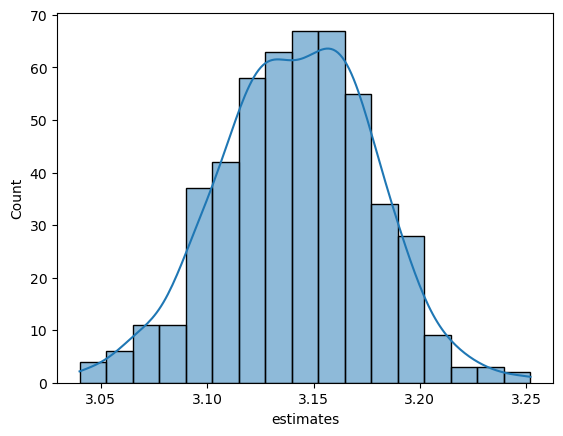

There are 260 estimates within the upper bound.
There are 227 estimates within the lower bound.
There are 0 estimates inside both bounds.


In [57]:
# Import results
estimates = pd.read_csv("/Users/dylanhayashi/Desktop/460 - Decision Analytics/Module 8/pi_estimates.csv").loc[:, "estimates"]

# Show summary stats
display(round(estimates.describe(), 5))
                                                                                                                                                                        
# Standard Error
standard_error_df = pd.DataFrame({'estimates' : estimates, 'pi' : 3.14})
standard_error_df['diff_squared'] = (standard_error_df.loc[:,'estimates'] - standard_error_df.loc[:,'pi'])**2
standard_error = round(np.sqrt(standard_error_df['diff_squared'].sum()/1998),5)
print(f'Standard Error of the Estimate: {standard_error}. Higher than above.')
                                                                                                                                                            
# Histogram
estimates_dist = sns.histplot(estimates, kde=True)
plt.show(estimates_dist)

# Calculate percent within 95% CI
estimates_df = pd.DataFrame({"estimates": estimates})
within_upper = estimates_df[estimates_df['estimates'] <= float(upper_limit)]

# Distribution of points
print(f"There are {len(within_upper)} estimates within the upper bound.")
print(f"There are {len(estimates_df[estimates_df['estimates'] >= float(lower_limit)])} estimates within the lower bound.")
print(f"There are {len(within_upper[within_upper['estimates'] >= float(lower_limit)])} estimates inside both bounds.")

#### Problem 2

In [253]:
def simulate_bonus():
                                                                                                                                                                                                                                     
    bonus = 0
                                                                                                                                                                            
    # Commission rates
    commission_rates = {"A": 10, "B": 15, "C": 20, "D": 25}

    # Generate number of bikes sold (Assumption: the probability distribution of selling 0 - 4 bikes is uniform.)
    bikes_sold = np.random.choice(np.arange(0, 9), p=[0.12, 0.12, 0.12, 0.12, 0.12, 0.14, 0.18, 0.06, 0.02])
    
    if bikes_sold < 5:
        return 0

    bike_type_list = []

    # Generate bike types
    for i in range(0, bikes_sold, 1):
        bike_type = np.random.choice(["A", "B", "C", "D"], p=[0.35, 0.45, 0.15, 0.05])
        bike_type_list.append(bike_type)

    # Calculate and total commissions from bikes
    for bike in bike_type_list:
        commission = commission_rates[bike]
        bonus += commission

    return bonus

Mean bonus: $34.1305



count    10000.000
mean        34.130
std         43.045
min          0.000
25%          0.000
50%          0.000
75%         80.000
max        145.000
dtype: float64

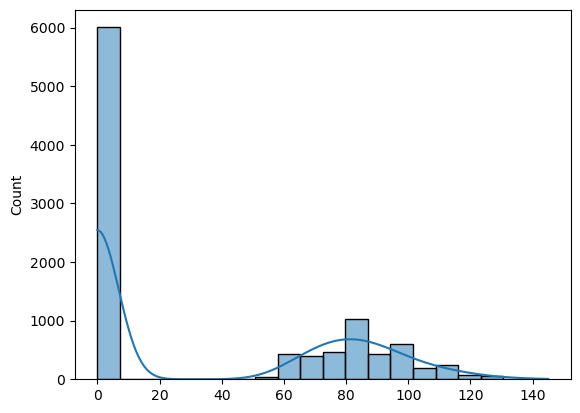

In [254]:
simulation_results = []
                                                                                                                                                                    
for i in range(1, 10001, 1):
    results = simulate_bonus()
    simulation_results.append(results)

simulation_results_series = pd.Series(simulation_results)

simulation_results_series.describe()

# Show distribution
results_dist = sns.histplot(simulation_results_series, kde=True)
print(f"Mean bonus: ${simulation_results_series.mean()}\n")
display(round(simulation_results_series.describe(), 3))
plt.show(estimates_dist)

#### Problem 3

In [10]:
def simulate_investments():
                                                                                                                                        
    # Starting figures
    age = 24
    salary = 48000
    balance_a = 0
    balance_b = 0
    balance_c = 0

    # Results dataframe
    results = pd.DataFrame(columns=["age", "salary", "contribution",
                                    "balance_a", "cont_a", "return_a", "end_balance_a",
                                    "balance_b", "cont_b", "return_b", "end_balance_b", 
                                    "balance_c", "cont_c", "return_c", "end_balance_c",
                                    "total_balance"])
    while age <= 60:
                                                                                                                                         
        starting_balance_a = round(balance_a, 2)
        starting_balance_b = round(balance_b, 2)
        starting_balance_c = round(balance_c, 2)

        # Calculate total contribution
        contribution = round(salary * 0.09, 2)
                                                                                                                                        
        # Calculate investment-specific contributions
        contribution_a = round(0.5 * contribution, 2)
        contribution_b = round(0.25 * contribution, 2)
        contribution_c = round(0.25 * contribution, 2)

        # Add contributions to investments
        balance_a += contribution_a
        balance_b += contribution_b
        balance_c += contribution_c

        # Generate rates of return
        return_a = random.gauss(0.0663, 0.01346)
        return_b = random.gauss(0.0989, 0.01528)
        return_c = random.gauss(0.0855, 0.0169)

        # Apply rates to balance
        balance_a = balance_a * (1 + return_a)
        balance_b = balance_b * (1 + return_b)
        balance_c = balance_c * (1 + return_c)

        # Save ending balances
        ending_balance_a = round(balance_a, 2)
        ending_balance_b = round(balance_b, 2)
        ending_balance_c = round(balance_c, 2)
                                                                                                                                    
        # Calculate total balance
        total_balance = balance_a + balance_b + balance_c

        # Save annual stats
        annual_stats = pd.DataFrame({"age": [age], "salary": [salary], "contribution": [contribution],
                                    "balance_a": [starting_balance_a], "cont_a": [contribution_a], 
                                    "return_a": [return_a], "end_balance_a": [ending_balance_a],
                                    "balance_b": [starting_balance_b], "cont_b": [contribution_b], 
                                    "return_b": [return_b], "end_balance_b": [ending_balance_b],
                                    "balance_c": [starting_balance_c], "cont_c": [contribution_c], 
                                    "return_c": [return_c], "end_balance_c": [ending_balance_c],
                                    "total_balance": [round(total_balance, 2)],})

        # Append to results dataframe
        results = results.append(annual_stats)
                                                                                                                                
        # Increase salary and age
        salary = round(salary * (1 + random.gauss(0.027, 0.004)), 2)
        age += 1

    results.to_csv("/Users/dylanhayashi/Desktop/460 - Decision Analytics/Module 8/bonus_estimates.csv")

    return round(total_balance, 2)

In [12]:
# Run a simulation
simulate_investments()
                                                                                                                                                                                    
# Show simulation output
results = pd.read_csv("/Users/dylanhayashi/Desktop/460 - Decision Analytics/Module 8/bonus_estimates.csv")
print("These are the results of a single simulation.")

display(results.drop("Unnamed: 0", axis=1))

These are the results of a single simulation.


,age,salary,contribution,balance_a,cont_a,return_a,end_balance_a,balance_b,cont_b,return_b,end_balance_b,balance_c,cont_c,return_c,end_balance_c,total_balance
0,24,48000.00,4320.00,0.00,2160.00,0.053910,2276.45,0.00,1080.00,0.110161,1198.97,0.00,1080.00,0.091447,1178.76,4654.18
1,25,49398.80,4445.89,2276.45,2222.95,0.064342,4788.90,1198.97,1111.47,0.095816,2531.82,1178.76,1111.47,0.115143,2553.94,9874.66
2,26,50249.38,4522.44,4788.90,2261.22,0.091125,7692.56,2531.82,1130.61,0.114489,4081.74,2553.94,1130.61,0.100403,4054.49,15828.79
3,27,51547.86,4639.31,7692.56,2319.66,0.076320,10776.36,4081.74,1159.83,0.096309,5746.38,4054.49,1159.83,0.080215,5632.58,22155.33
4,28,53559.44,4820.35,10776.36,2410.18,0.061103,13992.27,5746.38,1205.09,0.119261,7780.51,5632.58,1205.09,0.085266,7420.69,29193.48
5,29,54859.07,4937.32,13992.27,2468.66,0.090862,17956.60,7780.51,1234.33,0.086329,9793.08,7420.69,1234.33,0.074696,9301.52,37051.21
6,30,56325.28,5069.28,17956.60,2534.64,0.104050,22623.36,9793.08,1267.32,0.105625,12228.66,9301.52,1267.32,0.095800,11581.34,46433.36
7,31,57796.31,5201.67,22623.36,2600.84,0.061106,26765.55,12228.66,1300.42,0.087994,14719.56,11581.34,1300.42,0.078181,13888.87,55373.97
8,32,59731.72,5375.85,26765.55,2687.93,0.092717,32184.33,14719.56,1343.96,0.115952,17926.11,13888.87,1343.96,0.088566,16581.95,66692.38
9,33,61727.01,5555.43,32184.33,2777.72,0.053787,36842.55,17926.11,1388.86,0.092197,21095.76,16581.95,1388.86,0.068712,19205.61,77143.93


The mean ending total balance of my simulations was $1334199.27


count       1000.00
mean     1334199.27
std        49487.47
min      1182580.18
25%      1302893.88
50%      1332687.48
75%      1364863.12
max      1536170.02
dtype: float64

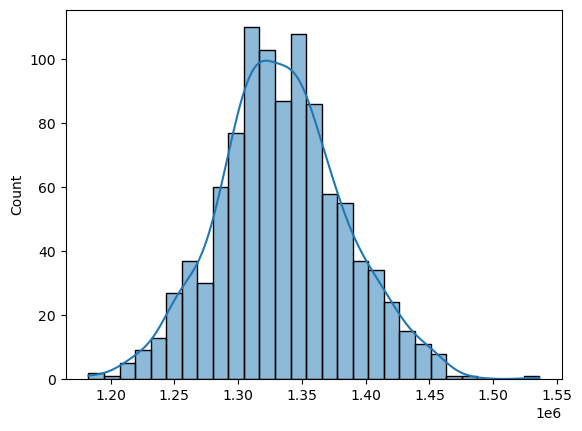

In [14]:
# Run simulations and save total balances to a list
                                                                                                                                                                                
simulation_results_list = []
                                                                                                                                                
for i in range(1, 1001, 1):
    estimate = simulate_investments()
    simulation_results_list.append(estimate)

simulation_results_series = pd.Series(simulation_results_list)

# Show descriptive statistics of simulation results
print(f"The mean ending total balance of my simulations was ${round(simulation_results_series.mean(),2)}")
round(simulation_results_series.describe(), 2)

# Describe
display(round(simulation_results_series.describe(), 2))
# Show distribution of results
estimates_dist = sns.histplot(simulation_results_series, kde=True)
plt.show(estimates_dist)

#### Problem 4

In [243]:
def objective_function(points):                                                                                      
    return 12 * points[0] + 16 * points[1] + 22 * points[2] + 8 * points[3]
                                                                                                                                                        
def generate_random_point():                                                                                                                                                                                          
    # Create random values
    random_point = [np.random.choice([0, 1], p=[0.5, 0.5]),
        np.random.choice([0, 1], p=[0.5, 0.5]),
        np.random.choice([0, 1], p=[0.5, 0.5]),
        np.random.choice([0, 1], p=[0.5, 0.5])]
                                                                                                                                                        
    # Ensure functional constraint is not violated. If it is, generate a new number
    while 4 * random_point[0] + 5 * random_point[1] + 7 * random_point[2] + 3 * random_point[3] > 14:
        random_point = [np.random.choice([0, 1], p=[0.5, 0.5]),
                        np.random.choice([0, 1], p=[0.5, 0.5]),
                        np.random.choice([0, 1], p=[0.5, 0.5]),
                        np.random.choice([0, 1], p=[0.5, 0.5])]
    return random_point
                                                                                                                                                                                                                    
def simulate_annealing():
    # Create lists of visited points and their values
    visited_points = []
    values = []

    # Create starting point and starting value, add them to lists
    starting_point = [0, 0, 0, 0]
    visited_points.append(starting_point)

    starting_value = objective_function(starting_point)
    values.append(starting_value)

    # Create best point and highest value
    best_point = starting_point
    highest_value = starting_value

    # Iterate
    for i in range(1, 100, 1):

        # Generate random point, add point to list
        random_point = generate_random_point()

        # Check if point already visited. If so, proceed to next iteration
        if random_point in visited_points:
            i += 1

        # If not, proceed
        else:

            # Add random point to visited point list
            visited_points.append(random_point)

            # Calculate objective function value, add value to list
            value = objective_function(random_point)
            values.append(value)

            # If new value is greater than previous highest value, assign new best point and highest value
            if value > highest_value:
                best_point = random_point
                highest_value = value

            i += 1

    results = (pd.DataFrame({"points": visited_points, "values": values})
               .sort_values("values", ascending=False)
               .reset_index()
               .drop("index", axis=1))
                                                                                                                                                                            
    print(f"Best point found: {results.sort_values('values', ascending = False).loc[:,'points'][0]}")
    print(f"Best point's objective value: {results.loc[:,'values'].max()}\n")

    display(results)

In [244]:
simulate_annealing()                                     

Best point found: [1, 0, 1, 1]
Best point's objective value: 42



,points,values
0,"[1, 0, 1, 1]",42
1,"[0, 1, 1, 0]",38
2,"[1, 1, 0, 1]",36
3,"[1, 0, 1, 0]",34
4,"[0, 0, 1, 1]",30
5,"[1, 1, 0, 0]",28
6,"[0, 1, 0, 1]",24
7,"[0, 0, 1, 0]",22
8,"[1, 0, 0, 1]",20
9,"[0, 1, 0, 0]",16
